# 1. Data Preprocessing:

### Steps: 
    1.Import the necessary libraries
    2.import the dataset
    3.Handling null values
    4.outlier detection---surya
    5.Seperate Dependent and independent variables
    6.Encoding
    7.splitting into training and testing set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer-churn-large-dataset.csv")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.isna().any()

CustomerID                    False
Name                          False
Age                           False
Gender                        False
Location                      False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
Churn                         False
dtype: bool

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
print(corr_matrix)

                            CustomerID       Age  Subscription_Length_Months  \
CustomerID                    1.000000 -0.001085                    0.005444   
Age                          -0.001085  1.000000                    0.003382   
Subscription_Length_Months    0.005444  0.003382                    1.000000   
Monthly_Bill                  0.001265  0.001110                   -0.005294   
Total_Usage_GB               -0.004025  0.001927                   -0.002203   
Churn                        -0.004586  0.001559                    0.002328   

                            Monthly_Bill  Total_Usage_GB     Churn  
CustomerID                      0.001265       -0.004025 -0.004586  
Age                             0.001110        0.001927  0.001559  
Subscription_Length_Months     -0.005294       -0.002203  0.002328  
Monthly_Bill                    1.000000        0.003187 -0.000211  
Total_Usage_GB                  0.003187        1.000000 -0.002842  
Churn                    

<Axes: >

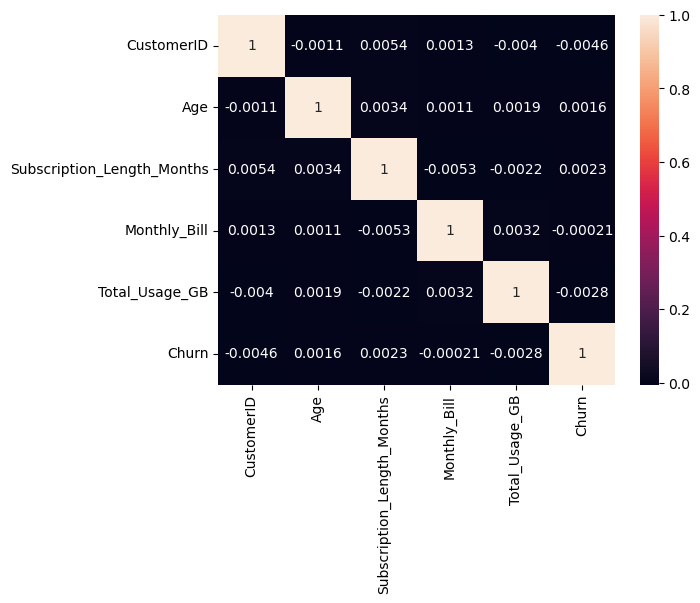

In [9]:
sns.heatmap(corr_matrix,annot=True)

<Axes: >

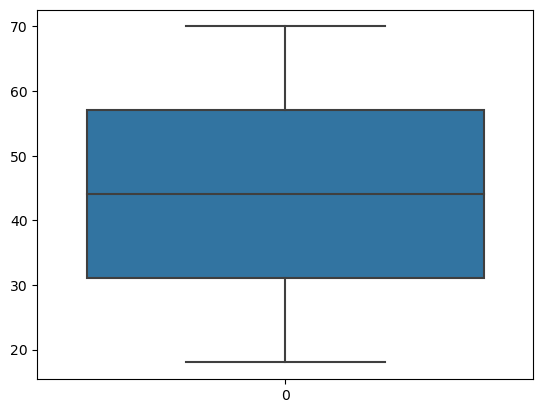

In [10]:
sns.boxplot(df.Age)

<Axes: >

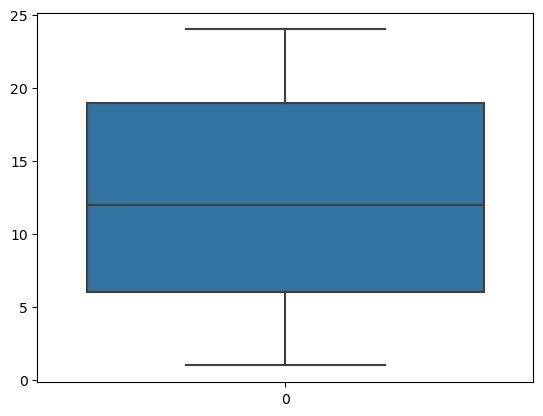

In [11]:
sns.boxplot(df.Subscription_Length_Months)

<Axes: >

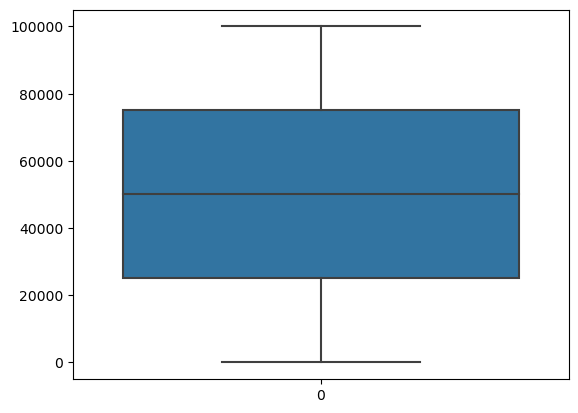

In [12]:
sns.boxplot(df.CustomerID)

<Axes: >

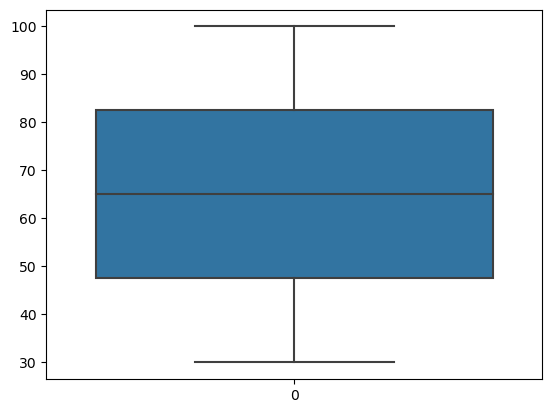

In [13]:
sns.boxplot(df.Monthly_Bill)

<Axes: >

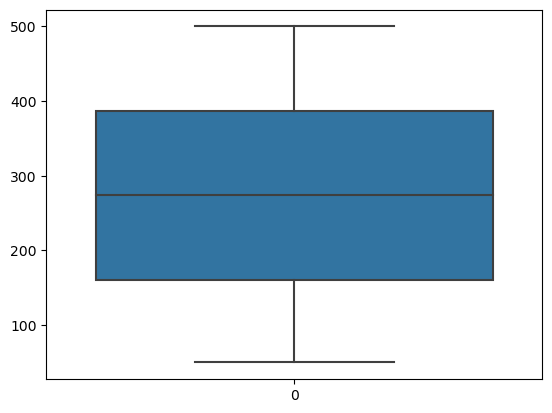

In [14]:
sns.boxplot(df.Total_Usage_GB)

In [15]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [16]:
x=df.iloc[:,:8]
x.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236
1,2,Customer_2,62,Female,New York,1,48.76,172
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460
3,4,Customer_4,36,Female,Miami,3,97.94,297
4,5,Customer_5,46,Female,Miami,19,58.14,266


In [17]:
y=df.Churn
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [18]:
type(x)

pandas.core.frame.DataFrame

In [19]:
type(y)

pandas.core.series.Series

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Gender=le.fit_transform(x.Gender)
x.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,1,Los Angeles,17,73.36,236
1,2,Customer_2,62,0,New York,1,48.76,172
2,3,Customer_3,24,0,Los Angeles,5,85.47,460
3,4,Customer_4,36,0,Miami,3,97.94,297
4,5,Customer_5,46,0,Miami,19,58.14,266


In [21]:
x.Location=le.fit_transform(x.Location)
x.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,1,2,17,73.36,236
1,2,Customer_2,62,0,4,1,48.76,172
2,3,Customer_3,24,0,2,5,85.47,460
3,4,Customer_4,36,0,3,3,97.94,297
4,5,Customer_5,46,0,3,19,58.14,266


In [22]:
x.Name=le.fit_transform(x.Name)
x.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,0,63,1,2,17,73.36,236
1,2,11112,62,0,4,1,48.76,172
2,3,22223,24,0,2,5,85.47,460
3,4,33334,36,0,3,3,97.94,297
4,5,44445,46,0,3,19,58.14,266


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70000, 8), (30000, 8), (70000,), (30000,))

In [25]:
x_train.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
42865,42866,36520,50,0,4,19,38.26,52
91446,91447,90499,36,1,4,12,99.19,315
66374,66375,62641,42,1,0,20,60.86,82
79106,79107,76788,68,1,3,9,53.45,360
13404,13405,3787,54,1,1,19,85.03,441


# 2. Feature Engineering:

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
x_test=sc.fit_transform(x_test)

In [28]:
x_train

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
42865,42866,36520,50,0,4,19,38.26,52
91446,91447,90499,36,1,4,12,99.19,315
66374,66375,62641,42,1,0,20,60.86,82
79106,79107,76788,68,1,3,9,53.45,360
13404,13405,3787,54,1,1,19,85.03,441
...,...,...,...,...,...,...,...,...
21243,21244,12497,57,0,0,5,32.16,309
45891,45892,39882,64,1,3,8,54.77,215
42613,42614,36241,59,0,4,22,60.77,85
43567,43568,37300,53,1,3,19,37.60,329


# 3.	Model Building
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [30]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
pred=dtc.predict(x_test)

/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [32]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
y_test

3582     0
60498    1
53227    0
21333    0
3885     0
        ..
86308    0
48870    1
34940    1
21964    0
27631    1
Name: Churn, Length: 30000, dtype: int64

In [34]:
x.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,0,63,1,2,17,73.36,236
1,2,11112,62,0,4,1,48.76,172
2,3,22223,24,0,2,5,85.47,460
3,4,33334,36,0,3,3,97.94,297
4,5,44445,46,0,3,19,58.14,266


In [35]:
dtc.predict(sc.transform([[4,33334,36,0,3,3,97.94,297]]))

/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [37]:
accuracy_score(y_test,pred)

0.4973

In [38]:
confusion_matrix(y_test,pred)

array([[    0, 15081],
       [    0, 14919]])

In [39]:
pd.crosstab(y_test,pred)

col_0,1
Churn,
0,15081
1,14919


In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15081
           1       0.50      1.00      0.66     14919

    accuracy                           0.50     30000
   macro avg       0.25      0.50      0.33     30000
weighted avg       0.25      0.50      0.33     30000



/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [41]:
probability=dtc.predict_proba(x_test)[:,1]
probability

/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

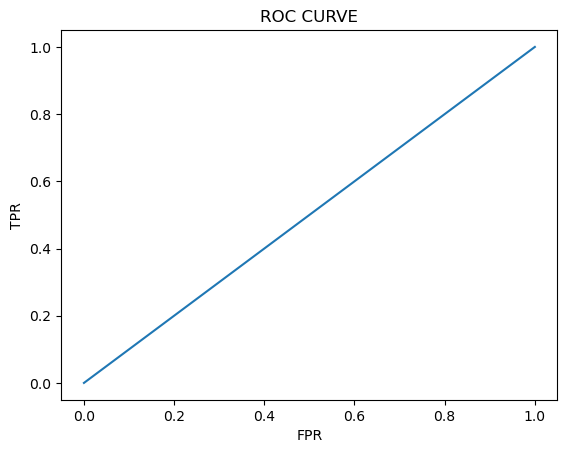

In [43]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

# 4. Model Optimization:

[Text(0.879754717298407, 0.9932432432432432, 'x[7] <= 447.5\ngini = 0.5\nsamples = 70000\nvalue = [35140, 34860]'),
 Text(0.8176379020108899, 0.9797297297297297, 'x[6] <= 96.585\ngini = 0.5\nsamples = 61699\nvalue = [30846, 30853]'),
 Text(0.7861319848159601, 0.9662162162162162, 'x[6] <= 96.545\ngini = 0.5\nsamples = 58684\nvalue = [29427, 29257]'),
 Text(0.7346390754253714, 0.9527027027027027, 'x[0] <= 99077.0\ngini = 0.5\nsamples = 58654\nvalue = [29405, 29249]'),
 Text(0.6362834669119808, 0.9391891891891891, 'x[1] <= 95109.5\ngini = 0.5\nsamples = 58100\nvalue = [29156, 28944]'),
 Text(0.4688931101273316, 0.9256756756756757, 'x[7] <= 441.5\ngini = 0.5\nsamples = 55756\nvalue = [27908, 27848]'),
 Text(0.14732782902433708, 0.9121621621621622, 'x[1] <= 9326.0\ngini = 0.5\nsamples = 54963\nvalue = [27546, 27417]'),
 Text(0.06052214633908383, 0.8986486486486487, 'x[1] <= 9183.0\ngini = 0.499\nsamples = 5408\nvalue = [2806, 2602]'),
 Text(0.041216918559800975, 0.8851351351351351, 'x[6] <=

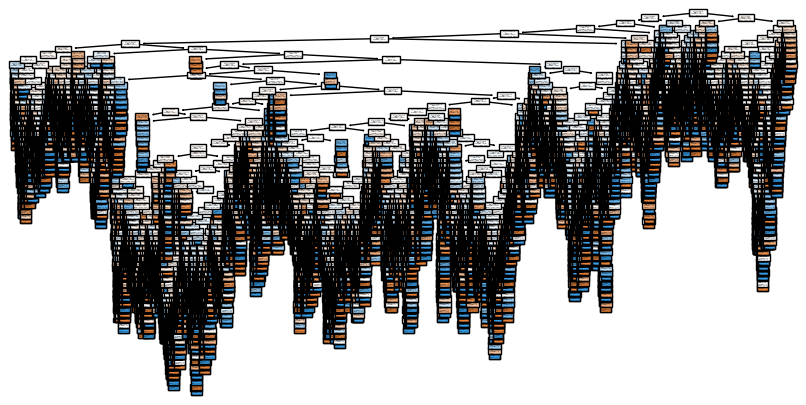

In [52]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(dtc,filled=True)

In [53]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [54]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [47]:
grid_search.fit(x_train,y_train)

/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/base.py", li

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [61]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00354261, 0.00258713, 0.00990181, 0.00563235, 0.01328478,
       0.00592651, 0.0018034 , 0.00188718, 0.01460505, 0.00646553,
       0.02298183, 0.00734468, 0.0017818 , 0.00178161, 0.02210169,
       0.00787344, 0.03100891, 0.00848007, 0.00196815, 0.0018908 ,
       0.02890892, 0.00875902, 0.03965158, 0.00906935, 0.0018023 ,
       0.00178409, 0.03483849, 0.00883756, 0.04741859, 0.01050062,
       0.00192547, 0.00175481, 0.01199689, 0.0058002 , 0.01583843,
       0.0058094 , 0.00181293, 0.00176015, 0.01701932, 0.00625782,
       0.02572775, 0.00729718, 0.00201182, 0.00180759, 0.02073441,
       0.00730195, 0.03093166, 0.00937676, 0.00202641, 0.00184469,
       0.03009005, 0.00802021, 0.04395566, 0.00918193, 0.00181789,
       0.00179148, 0.03566265, 0.00974779, 0.05953536, 0.0107245 ]), 'std_fit_time': array([5.99807023e-04, 4.96172387e-04, 3.79799166e-03, 4.00647377e-04,
       2.28193335e-03, 1.52837772e-04, 7.30831312e-05, 1.61990545e-04,
       3.82189680e

In [69]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'log2',
 'splitter': 'best'}

In [76]:
dtc_cv=DecisionTreeClassifier(criterion= 'gini',
 max_depth=5,
 max_features='log2',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [77]:
pred=dtc_cv.predict(x_test)

/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     15081
           1       0.00      0.00      0.00     14919

    accuracy                           0.50     30000
   macro avg       0.25      0.50      0.33     30000
weighted avg       0.25      0.50      0.34     30000



/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jyothsnadevitiruveedhula/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif